# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [2]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('titanic.csv', index_col=0)

Use the `.info()` method to quickly preview which features have missing data

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 1.0 to 839.0
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1391 non-null   float64
 1   Pclass    1391 non-null   object 
 2   Name      1391 non-null   object 
 3   Sex       1391 non-null   object 
 4   Age       1209 non-null   float64
 5   SibSp     1391 non-null   float64
 6   Parch     1391 non-null   float64
 7   Ticket    1391 non-null   object 
 8   Fare      1391 non-null   float64
 9   Cabin     602 non-null    object 
 10  Embarked  1289 non-null   object 
dtypes: float64(5), object(6)
memory usage: 130.4+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

29.731894127378
27.0
16.070124603444675


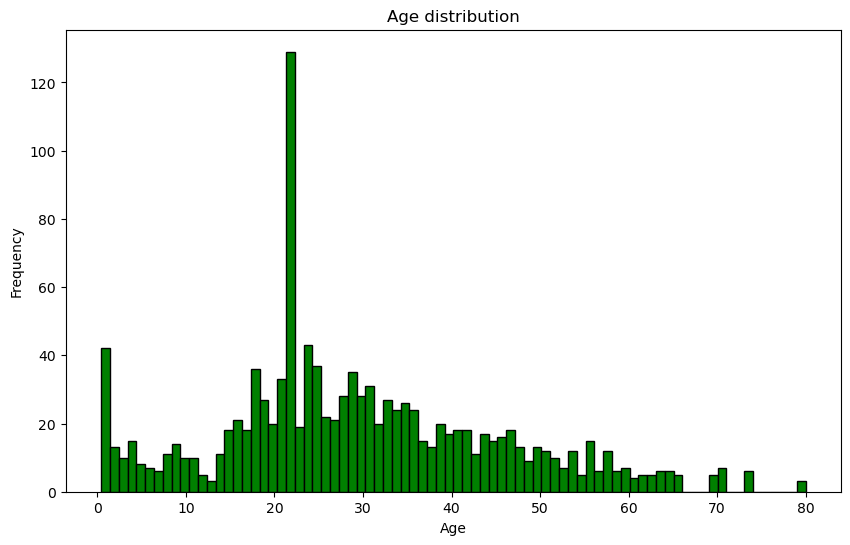

In [5]:
# Your code here
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_age = df['Age'].std()

print(mean_age)
print(median_age)
print(std_age)

plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=80, color='green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

plt.show()

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

29.731894127377995
29.731894127378
14.981155476045366


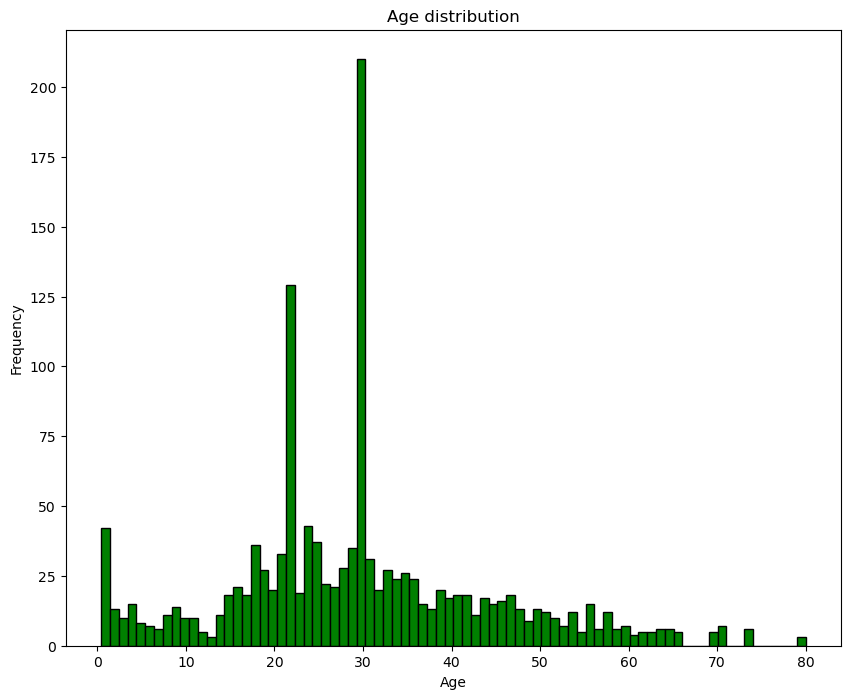

In [14]:
# Your code here
df2 = df.copy()

df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

new_mean_age = df2['Age'].mean()
new_median_age = df2['Age'].median()
new_std_age = df2['Age'].std()

print(new_mean_age)
print(new_median_age)
print(new_std_age)

plt.figure(figsize=(10,8))
plt.hist(df2['Age'], bins = 80, color='green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

plt.show()

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

29.37445003594536
27.0
15.009475778073446


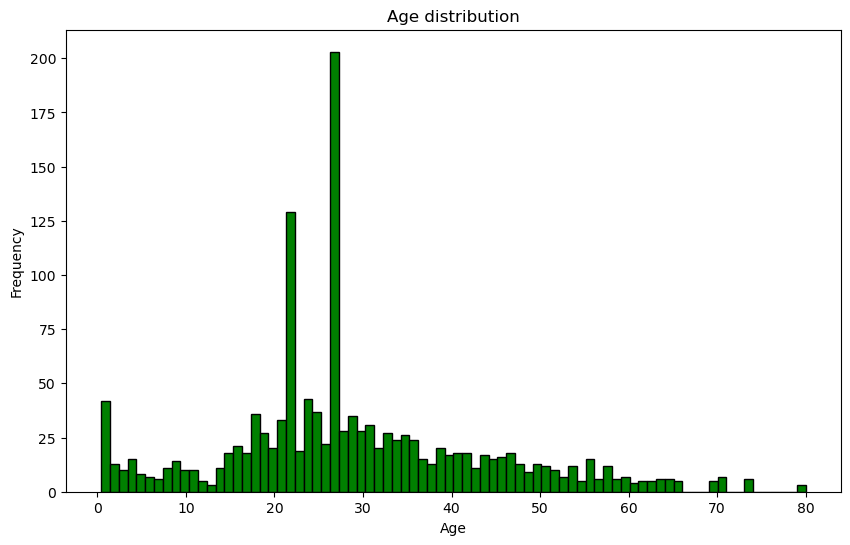

In [16]:
# Your code here
df3 = df.copy()

df3['Age'] = df3['Age'].fillna(df3['Age'].median())

print(df3['Age'].mean())
print(df3['Age'].median())
print(df3['Age'].std())

plt.figure(figsize=(10, 6))
plt.hist(df3['Age'], bins=80, color='green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

plt.show()

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

29.731894127378
27.0
16.070124603444675


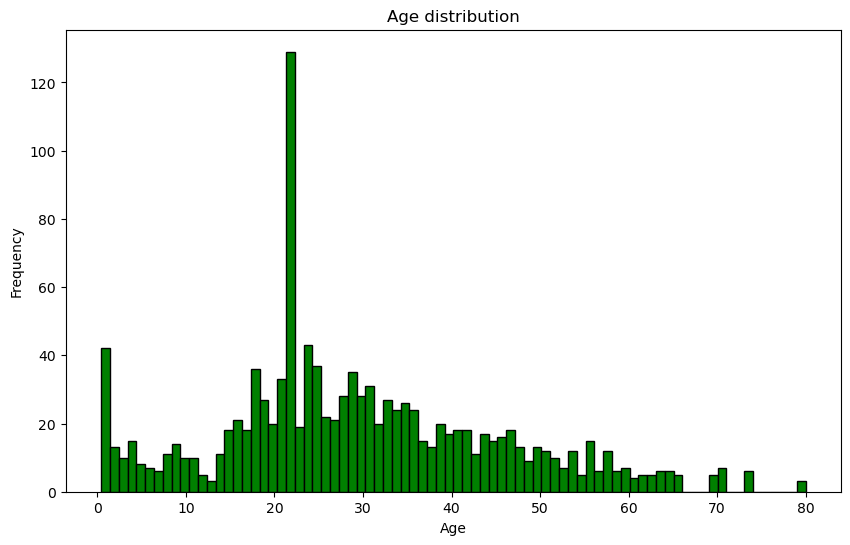

In [17]:
# Your code here

df.dropna(subset='Age', inplace=True)

print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].std())

plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins = 80, color='green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

plt.show()

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.